# Capstone project

## Brazilian Amazon Rainforest Degradation 1999-2019

### Data Description

The dataset that will be analysed here is obtained by Kaggle, see the link below:

https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation?select=def_area_2004_2019.csv

The dataset contains total of 3 files, and here we will join files in order to answer on five questions that you can see it below. 
The columnames of each file are:

- 'start year', 'end year', 'phenomenon', 'severity'
- 'year', 'month', 'state', 'latitude', 'longitude', 'firespots'
- 'Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO', 'AMZ LEGAL'
    
The dataset is analysed by using different python libraries: pandas, numpy, scipy and matplotlib.

Questions on which we will try to answer are:

- 1. Was there a decline or rise in the number of fire outbreaks?
- 2. Which state bears the greatest number of fire outbreaks?
- 3. Is there a correlation between the deforestation area and the number of fire outbreaks?
- 4. Is the Amazon deforestation increasing over the years?
- 5. Have there been years in which the deforestation declined?
- 6. 


In [2]:
# import libaries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import numpy as np

In [3]:
#import files
df_n = pd.read_csv('../Datasets/phenomenons-04-19.csv', sep = ';')
df_a = pd.read_csv('../Datasets/fireoutbreaks-99-19.csv', sep = ';')
df_da = pd.read_csv('../Datasets/deforestation-area-04-19.csv', sep = ';')

## Explore datasets

In [8]:
#print columnames of each file
print(list(df_n.columns.values),'\n', list(df_a.columns.values),'\n', list(df_da.columns.values))

['start year', 'end year', 'phenomenon', 'severity'] 
 ['year', 'month', 'state', 'latitude', 'longitude', 'firespots'] 
 ['Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO', 'AMZ LEGAL']


In [10]:
#Check for the datatypes of the columns in datasets
print('Data types:\n',df_n.dtypes)
print('\n')
print('Data types:\n',df_a.dtypes)
print('\n')
print('Data types:\n',df_da.dtypes)

Data types:
 start year     int64
end year       int64
phenomenon    object
severity      object
dtype: object


Data types:
 year          int64
month         int64
state        object
latitude     object
longitude    object
firespots     int64
dtype: object


Data types:
 Ano/Estados    int64
AC             int64
AM             int64
AP             int64
MA             int64
MT             int64
PA             int64
RO             int64
RR             int64
TO             int64
AMZ LEGAL      int64
dtype: object


In [11]:
# check for nulls in datasets
# also, display a summary of the dataset
print('def_area:\n',df_da.info())
print('elninolanina:\n',df_n.info())
print('brasilian_fires:\n', df_a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano/Estados  16 non-null     int64
 1   AC           16 non-null     int64
 2   AM           16 non-null     int64
 3   AP           16 non-null     int64
 4   MA           16 non-null     int64
 5   MT           16 non-null     int64
 6   PA           16 non-null     int64
 7   RO           16 non-null     int64
 8   RR           16 non-null     int64
 9   TO           16 non-null     int64
 10  AMZ LEGAL    16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB
def_area:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start year  16 non-null     int64 
 1   end year    16 non-null     int64 
 2   phenomenon  16 non-null     object
 3   severity    16 

In [12]:
# number of unique values in each column
df_a.nunique()

year           21
month          12
state           9
latitude     2100
longitude    2102
firespots     954
dtype: int64

In [15]:
#make a subset
df_a_subset = df_a[['year', 'month', 'state', 'firespots']]
df_a_subset.head()

,year,month,state,firespots
0,1999,1,AMAZONAS,3
1,1999,1,MARANHAO,36
2,1999,1,MATO GROSSO,18
3,1999,1,PARA,87
4,1999,1,RONDONIA,1


## Questions

### Question 1

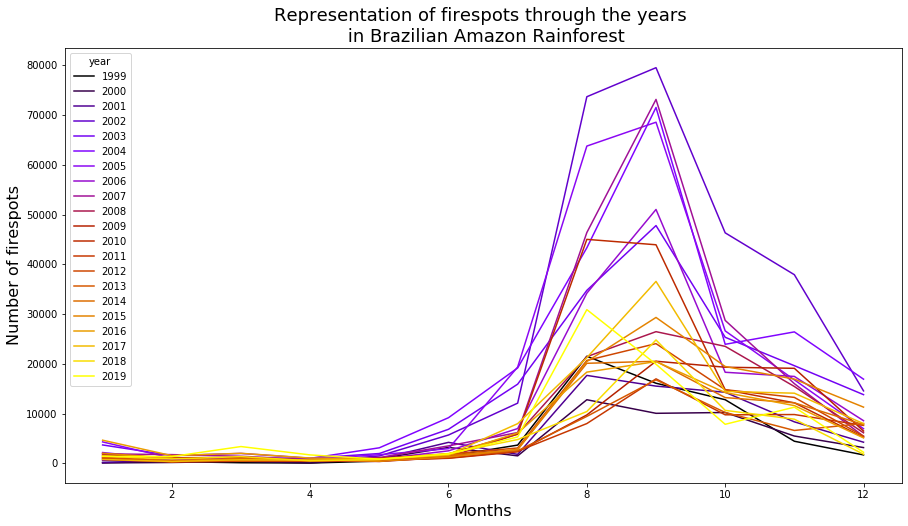

In [14]:
#Question 1 Was there a decline or rise in the number of fire outbreaks during a period of time between 1999 to 2019?
from matplotlib import cm
# plot
group = df_a_subset.groupby(['year', 'month'])['firespots'].sum().sort_values()
#cmap = cm.get_cmap('Spectral')  # list of colors https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmap = cm.get_cmap('gnuplot') 
group_plot = group.unstack(0).plot.line(figsize = (15,8),cmap=cmap)
group_plot.set_xlabel("Months", fontsize=16)
group_plot.set_ylabel("Number of firespots", fontsize=16)
plt.title('Representation of firespots through the years \n in Brazilian Amazon Rainforest', fontsize=18)

plt.show ()

### Answer:
The line plot shows the total number of firespots per months where each line represent a year in the period between 1999 to 2019. 
On this plot we can observe that highest number of firespots happened in the period between 2002 and 2010, which is colored by using a Miscellaneous colormap provided by matplotlib.

### Question 2

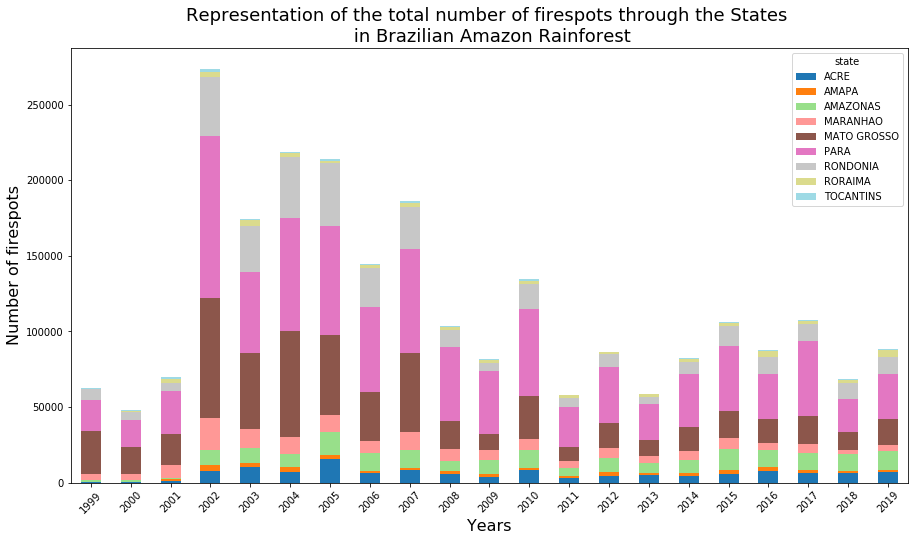

In [55]:
#Question 2: Which state bears the greatest number of fire outbreaks?
group2 = df_a_subset.groupby(['state', 'year'])['firespots'].sum().sort_values()
cmap = cm.get_cmap('tab20') 
group2_plot = group2.unstack(0).plot.bar(figsize = (15,8),cmap=cmap, rot=45, stacked=True)
group2_plot.set_xlabel("Years", fontsize=16)
group2_plot.set_ylabel("Number of firespots", fontsize=16)
plt.title('Representation of the total number of firespots through the States \n in Brazilian Amazon Rainforest', fontsize=18)
plt.show ()

### Answer: 
On this stacked barplot is shown the number of firespots per year in period of 1999 to 2019 in different states.
We can see that two states (Mato Grosso and Para) have the most occurence of firesspots throughout the years than other states combined.


### Question 3

In [18]:
# Question 3: Is there a correlation between storm strength with the number of fire outbreaks?
# In order to obtain this information we have to join two tables
# But before that we have to change column names and unpivot on the deforestation area table

In [37]:
#change the column names that we can use it to join it with other table
df_da2 = df_da.rename(columns = {'Ano/Estados':'year', 'AC':'ACRE', 'AM':'AMAZONAS', 
                             'AP':'AMAPA', 'MA':'MARANHAO', 'MT': 'MATO GROSSO', 'PA':'PARA',
                             'RO':'RONDONIA', 'RR':'RORAIMA', 'TO':'TOCANTINS'})


In [38]:
# using a function melt
melt_da = df_da2.melt(id_vars=["year"], var_name="state", value_name="def_area")
melt_da.head()

,year,state,def_area
0,2004,ACRE,728
1,2005,ACRE,592
2,2006,ACRE,398
3,2007,ACRE,184
4,2008,ACRE,254


In [27]:
#do subset with extracted columns
new_df = df_a_subset[['year','state','firespots']]
# group by year and state columns and use a sum function to have a total of firespots 
new_df2 = new_df.groupby(['year','state']).sum().reset_index()

In [29]:
#merge def_area with the subset of fireoutbreaks file
all_three_df = new_df2.merge(melt_da, on = ['year', 'state'])
#all_three_df.head()

In [32]:
#calculate correlation between two variables
corr = pearsonr(all_three_df['def_area'], all_three_df['firespots'])
corr = [np.round(c, 2) for c in corr]
# use text to set line label for legend on the plot
text = 'r = %s' % (corr[0])
print(corr, '\n', text)

[0.91, 0.0] 
 r = 0.91


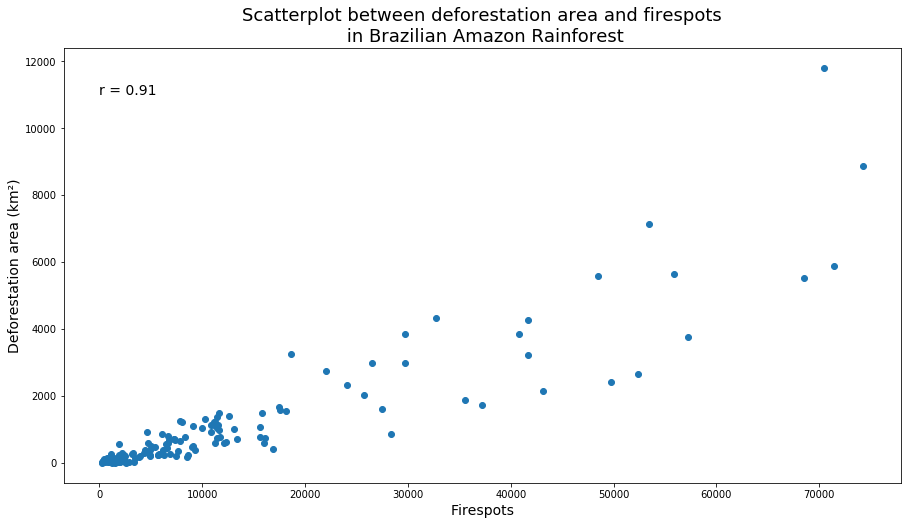

In [45]:
plt.figure(figsize=(15,8))
plt.scatter(all_three_df.firespots, all_three_df.def_area)
plt.text(20, 11000, text, fontsize=14)
plt.xlabel("Number of firespots", fontsize=14)
plt.ylabel("Deforestation area (km²)", fontsize=14)
plt.title('Scatterplot between deforestation area and firespots\n in Brazilian Amazon Rainforest', fontsize=18)
plt.show()

### Answer:

The plot shows a positve correlation of 0.91 between the deforestation area and total number of firespots per year.

### Question 4

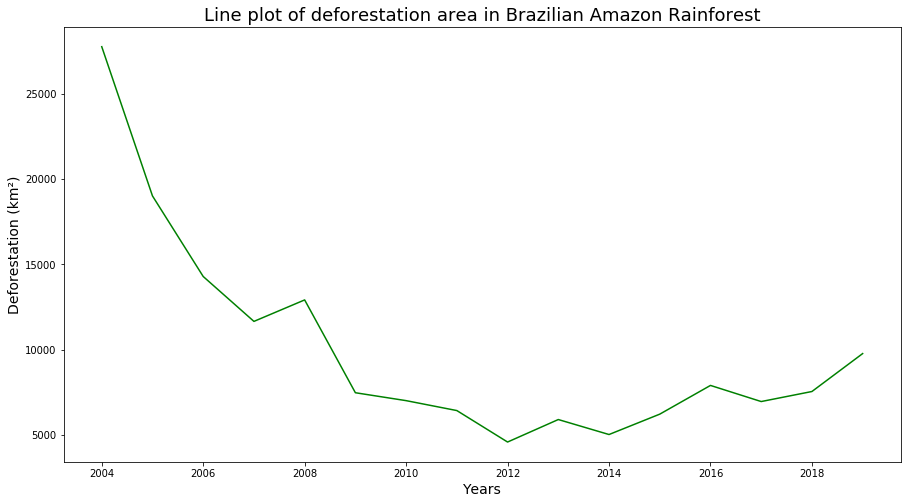

In [46]:
# Question 4
# set the figure size
plt.figure(figsize=(15,8))

# Plot the data
plt.plot(df_da['Ano/Estados'],df_da['AMZ LEGAL'], color = 'g')

# Add an axis name
plt.xlabel("Years", fontsize=14)
plt.ylabel("Deforestation (km²)", fontsize=14)

# Add an title name
plt.title('Line plot of deforestation area in Brazilian Amazon Rainforest', fontsize=18)


# Show the plot
plt.show()

### Answer:
- As can be seen in the graph, deforestation is again increasing since 2014. 
- The differences in increase and decrease are mainly due to various changes in politics.
- Even though there is a constant decrease in Amazon area, there have also been years in which deforestation either decreased or stopped - years: 2004, 2011, 2013, 2016

### Question 5

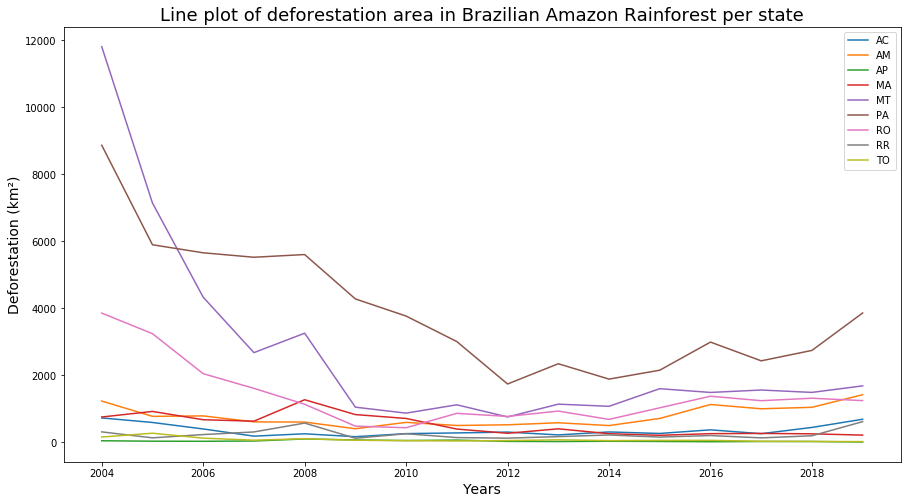

In [4]:
# Question 5
# set the figure size
plt.figure(figsize=(15,8))

# Plot the data
plt.plot(df_da['Ano/Estados'],df_da['AC'])
plt.plot(df_da['Ano/Estados'],df_da['AM'])
plt.plot(df_da['Ano/Estados'],df_da['AP'])
plt.plot(df_da['Ano/Estados'],df_da['MA'])
plt.plot(df_da['Ano/Estados'],df_da['MT'])
plt.plot(df_da['Ano/Estados'],df_da['PA'])
plt.plot(df_da['Ano/Estados'],df_da['RO'])
plt.plot(df_da['Ano/Estados'],df_da['RR'])
plt.plot(df_da['Ano/Estados'],df_da['TO'])

# Add legend
plt.legend(['AC', 'AM', 'AP', 'MA','MT', 'PA', 'RO', 'RR', 'TO'])

# Add an axis name
plt.xlabel("Years", fontsize=14)
plt.ylabel("Deforestation (km²)", fontsize=14)

# Add an title name
plt.title('Line plot of deforestation area in Brazilian Amazon Rainforest per state', fontsize=18)

# Show the plot
plt.show()

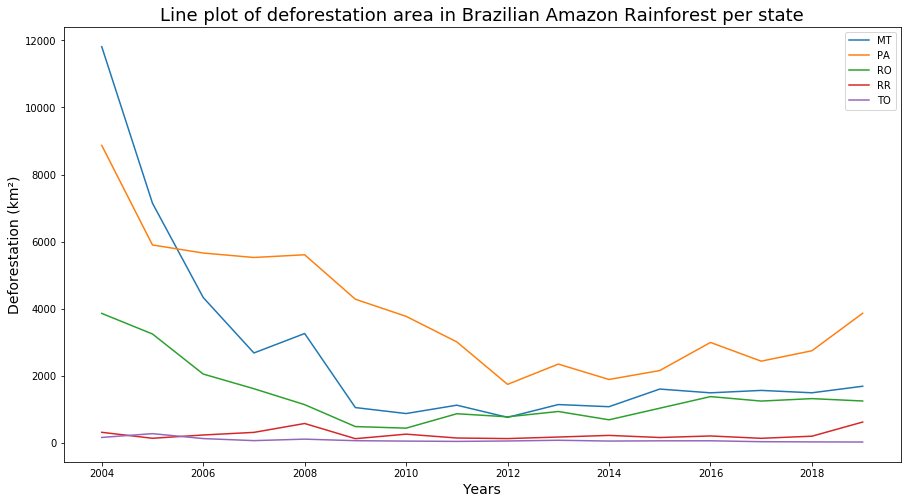

In [52]:
# Question 5
# set the figure size
plt.figure(figsize=(15,8))

# Plot the data
plt.plot(df_da['Ano/Estados'],df_da['MT'])
plt.plot(df_da['Ano/Estados'],df_da['PA'])
plt.plot(df_da['Ano/Estados'],df_da['RO'])
plt.plot(df_da['Ano/Estados'],df_da['RR'])
plt.plot(df_da['Ano/Estados'],df_da['TO'])

# Add legend
plt.legend(['MT', 'PA', 'RO', 'RR', 'TO'])

# Add an axis name
plt.xlabel("Years", fontsize=14)
plt.ylabel("Deforestation (km²)", fontsize=14)

# Add an title name
plt.title('Line plot of deforestation area in Brazilian Amazon Rainforest per state', fontsize=18)

# Show the plot
plt.show()

### Answer:
- The Acre - AC - and Amazonas - AM - state both had the highest increase in 2017.
- In 2007 the Maranhao - MA - state also had an extreme increase in deforestation.
- In AP RR and TO have been the least deforestation.

### Question 6

In [58]:
el_nino_cross = pd.crosstab(df_n["phenomenon"], df_n["severity"])
el_nino_cross

severity,Moderate,Strong,Very Strong,Weak
phenomenon,,,,
El Nino,2,0,1,4
La Nina,1,3,0,5


In [59]:
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

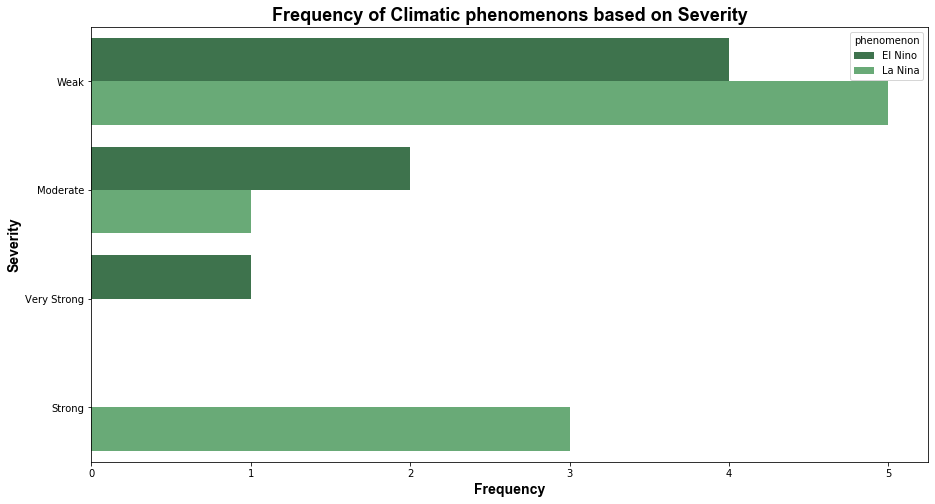

In [66]:
plt.figure(figsize=(15,8))
title_font = {'family': 'arial', 'color': 'black','weight': 'bold','size': 18 }
axis_font  = {'family': 'arial', 'color': 'black','weight': 'bold','size': 14 }

sns.countplot(y="severity", hue="phenomenon", data=df_n, palette="Greens_d")
plt.title("Frequency of Climatic phenomenons based on Severity",fontdict=title_font)
plt.ylabel("Severity",fontdict=axis_font)
plt.xlabel("Frequency",fontdict=axis_font)
plt.show()